<a href="https://colab.research.google.com/github/aaryyya/MLDLAlgorithmsTYITAssignments/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
    Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
Dataset Info:
 None


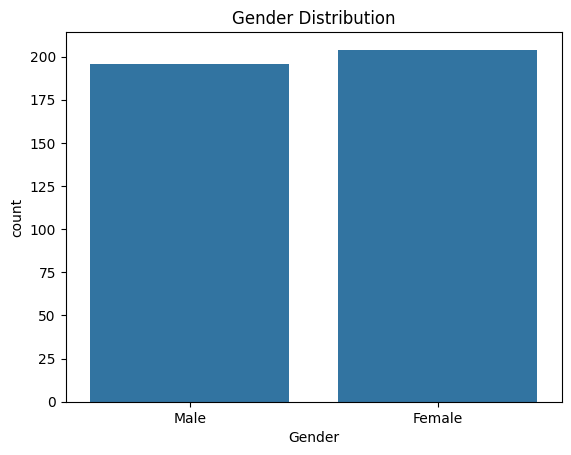

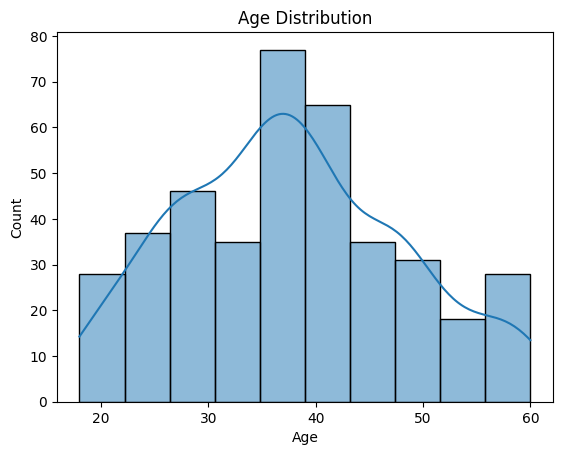

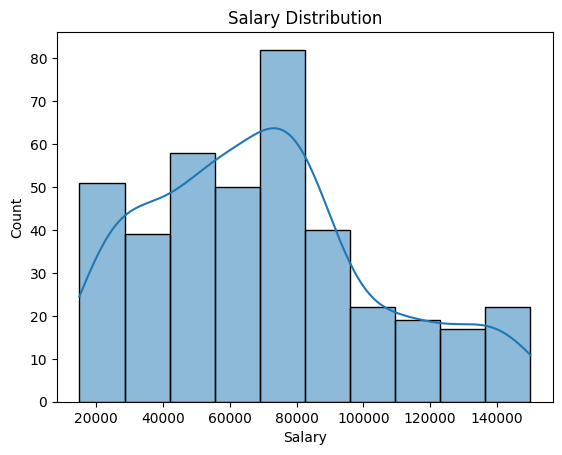

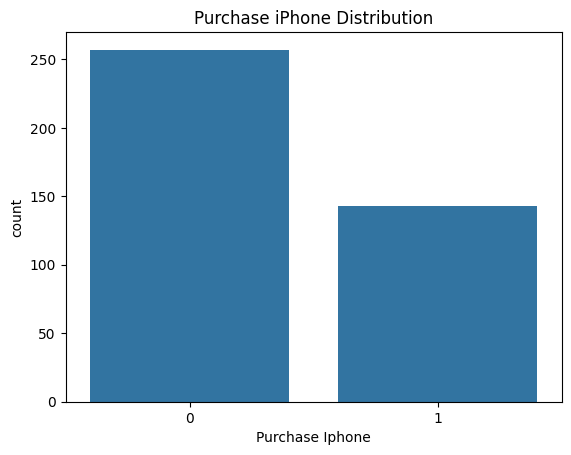

Model Accuracy: 91.25%


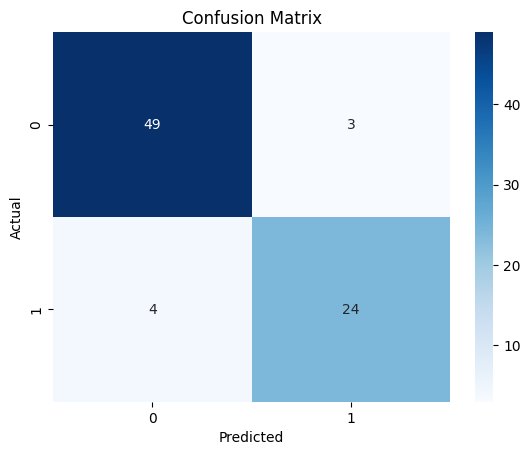

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.89      0.86      0.87        28

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80

Prediction for new data point 1: No Purchase
Prediction for new data point 2: No Purchase


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


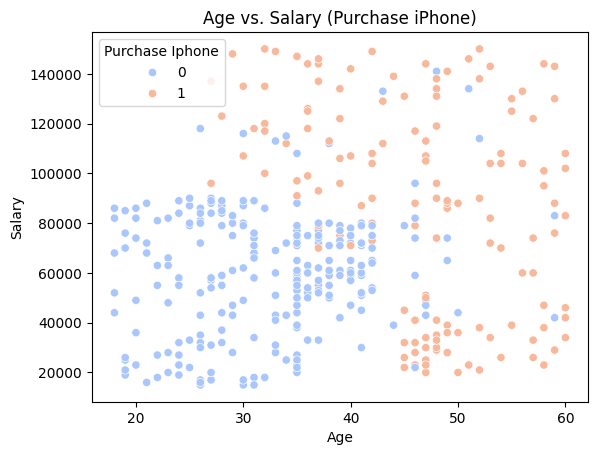

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset (download from Kaggle and specify the path)
dataset_path = '/content/iphone_purchase_records.csv'  # Replace with your actual dataset path
df = pd.read_csv(dataset_path)

# Display basic dataset information
print("Dataset Head:\n", df.head())
print("Dataset Info:\n", df.info())

# Visualize the dataset
# Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Age Distribution
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.show()

# Salary Distribution
sns.histplot(df['Salary'], kde=True, bins=10)
plt.title('Salary Distribution')
plt.show()

# Purchase Distribution
sns.countplot(x='Purchase Iphone', data=df)
plt.title('Purchase iPhone Distribution')
plt.show()

# Encode 'Gender' (categorical) into numerical values
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male=1, Female=0

# Extract features and target
X = df[['Gender', 'Age', 'Salary']]  # Features
y = df['Purchase Iphone']  # Target variable

# Standardize numerical features (Age and Salary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Choose an appropriate k value

# Train the model
knn.fit(X_train, y_train)

# Test the model
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Example of predicting new data points
new_data = [[1, 28, 60000], [0, 34, 72000]]  # Gender: Male/Female, Age, Salary
new_data_scaled = scaler.transform(new_data)
predictions = knn.predict(new_data_scaled)

# Display predictions
for i, pred in enumerate(predictions):
    result = "Purchase iPhone" if pred == 1 else "No Purchase"
    print(f"Prediction for new data point {i + 1}: {result}")

# Scatterplot of Age vs Salary, colored by Purchase
sns.scatterplot(x='Age', y='Salary', hue='Purchase Iphone', data=df, palette='coolwarm')
plt.title('Age vs. Salary (Purchase iPhone)')
plt.show()
